In [1]:
from scipy import stats
import numpy as np

# Define the likelihood function with head-to-head match outcomes
def likelihood(mu_1, mu_2, sigma_1_squared, sigma_2_squared, matches_won_1, matches_won_2):
    prob_win = stats.norm.cdf((mu_1 - mu_2) / np.sqrt(sigma_1_squared + sigma_2_squared))
    
    # Calculate the expected win probability based on skills
    expected_prob = prob_win
    
    # Calculate the observed win probability as a binomial distribution
    observed_prob = stats.binom.pmf(matches_won_1, matches_won_1 + matches_won_2, expected_prob)
    
    return observed_prob


# Define the prior function for skills (mu) with normal distribution
def prior(mu, prior_mean, prior_std):
    return stats.norm.pdf(mu, prior_mean, prior_std)

# Compute the acceptance ratio
def acceptance_ratio(mu_1, mu_2, sigma_1_squared, sigma_2_squared, mu_1_new, mu_2_new, matches_1, matches_2):
    prior_ratio = (prior(mu_1_new, prior_mu_1_mean, prior_mu_1_std) * prior(mu_2_new, prior_mu_2_mean, prior_mu_2_std)) / \
                  (prior(mu_1, prior_mu_1_mean, prior_mu_1_std) * prior(mu_2, prior_mu_2_mean, prior_mu_2_std))
    likelihood_ratio = likelihood(mu_1_new, mu_2_new, sigma_1_squared, sigma_2_squared, matches_1, matches_2) / \
                       likelihood(mu_1, mu_2, sigma_1_squared, sigma_2_squared, matches_1, matches_2)
    return min(1, prior_ratio * likelihood_ratio)

# Define prior distributions for mu_1, mu_2, sigma_1^2, and sigma_2^2
prior_mu_1_mean = 25  # Prior mean for player/team 1 skill
prior_mu_1_std = 4    # Prior standard deviation for player/team 1 skill

prior_mu_2_mean = 25  # Prior mean for player/team 2 skill
prior_mu_2_std = 4    # Prior standard deviation for player/team 2 skill

prior_sigma_1_squared = 5  # Prior variance for player/team 1 skill
prior_sigma_2_squared = 5  # Prior variance for player/team 2 skill

# Initialize values
mu_1 = np.random.normal(prior_mu_1_mean, prior_mu_1_std)
mu_2 = np.random.normal(prior_mu_2_mean, prior_mu_2_std)

sigma_1_squared = prior_sigma_1_squared
sigma_2_squared = prior_sigma_2_squared

matches_won_team_1 = 200  # Number of matches won by Team 1 against Team 2
matches_won_team_2 = 15  # Number of matches won by Team 2 against Team 1

results_mu_1 = []
results_mu_2 = []

# MCMC parameters
n_samples = 50000
burn_in = 5000
lag = 5

# Create the MCMC loop
for i in range(n_samples):
    # Propose new values of mu_1 and mu_2 from their prior distributions
    mu_1_new = np.random.normal(prior_mu_1_mean, prior_mu_1_std)
    mu_2_new = np.random.normal(prior_mu_2_mean, prior_mu_2_std)
    
    # Compute acceptance probability using the new proposed values
    R = acceptance_ratio(mu_1, mu_2, sigma_1_squared, sigma_2_squared, mu_1_new, mu_2_new, matches_won_team_1, matches_won_team_2)
    
    # Draw random sample to compare R to
    u = np.random.random_sample()
    
    # If R is greater than u, accept the new values of mu_1 and mu_2
    if u < R:
        mu_1 = mu_1_new
        mu_2 = mu_2_new
    
    # Record values after burn in - how often determined by lag
    if i > burn_in and i % lag == 0:
        results_mu_1.append(mu_1)
        results_mu_2.append(mu_2)

# Results represent samples from the posterior distribution of skills for both players/teams
print(np.mean(results_mu_1), np.var(results_mu_1)**0.5)
print(np.mean(results_mu_2), np.var(results_mu_2)**0.5)



27.338662451276292 2.0069457520439182
22.681737665408335 2.0032214657492595


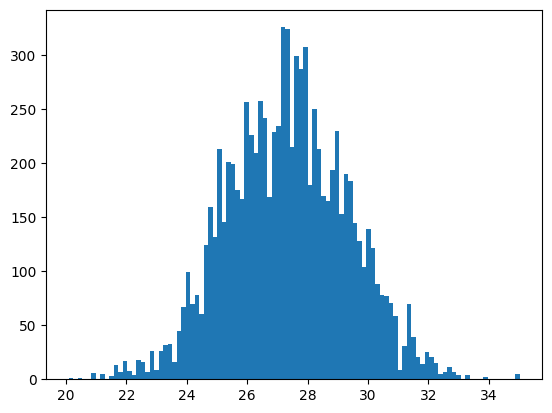

In [3]:
import matplotlib.pyplot as plt

plt.hist(results_mu_1, bins = 100)
plt.show()